In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks
from matplotlib.pyplot import yticks

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/AI/insurance.csv"))
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [4]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [5]:
df.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [6]:
df.shape

(1338, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
#checking duplicates
sum(df.duplicated(subset = 'age')) == 0
# No duplicate values

False

In [9]:
# Checking Null values
df.isnull().sum()*100/df.shape[0]
# There are no NULL values in the dataset, hence it is clean.

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
expenses    0.0
dtype: float64

<ipython-input-10-c355440c28bd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['expenses'])


<Axes: xlabel='expenses', ylabel='Density'>

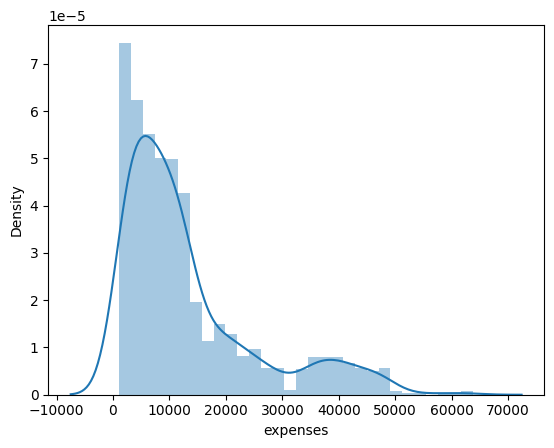

In [10]:
sns.distplot(df['expenses'])

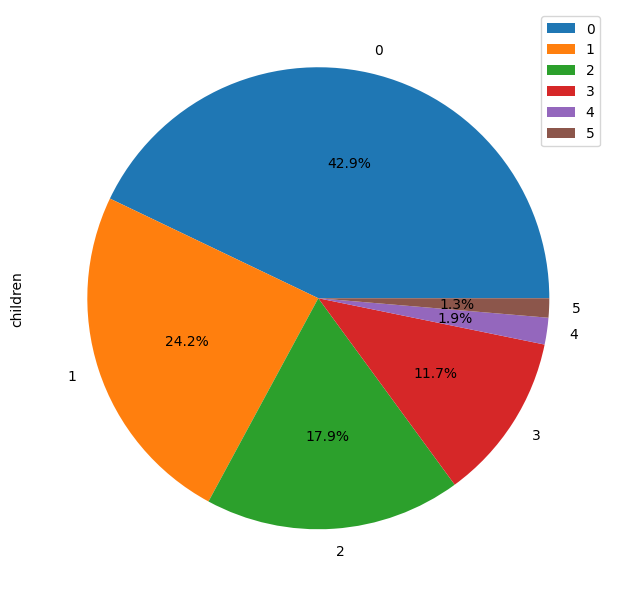

<Figure size 640x480 with 0 Axes>

In [11]:
df_sym = pd.DataFrame(df['children'].value_counts())
df_sym.plot.pie(subplots=True,labels = df_sym.index.values, autopct='%1.1f%%', figsize = (15,7.5))
# Unsquish the pie.
plt.gca().set_aspect('equal')
plt.show()
plt.tight_layout()

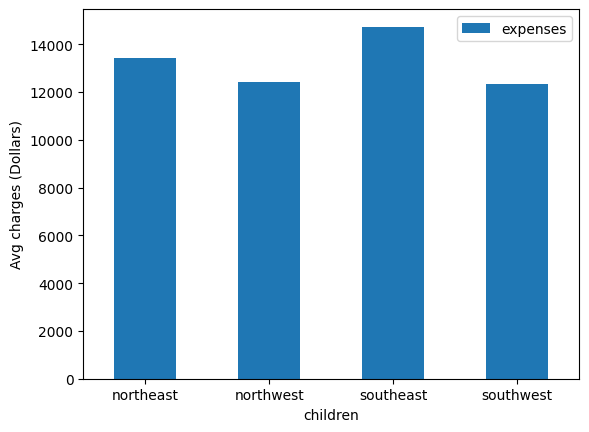

In [12]:
plt1 = df[['region','expenses']].groupby("region").mean().plot(kind='bar',legend = True,)
plt1.set_xlabel("children")
plt1.set_ylabel("Avg charges (Dollars)")
xticks(rotation = 0)
plt.show()


<ipython-input-13-3394fdaf98d0>:2: FutureWarning: `sort_columns` is deprecated and will be removed in a future version.
  plt1 = df_comp_avg_price.plot(x = 'region', kind='bar',legend = True, sort_columns = True, figsize = (15,3))


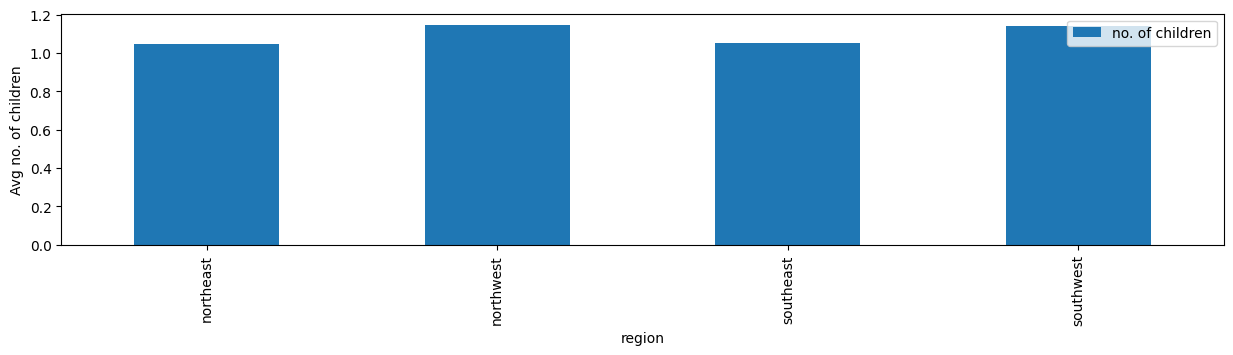

In [13]:
df_comp_avg_price = df[['region','children']].groupby("region", as_index = False).mean().rename(columns={'children':'no. of children'})
plt1 = df_comp_avg_price.plot(x = 'region', kind='bar',legend = True, sort_columns = True, figsize = (15,3))
plt1.set_xlabel("region")
plt1.set_ylabel("Avg no. of children")
xticks(rotation = 90)
plt.show()

In [14]:
df.children.describe()

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

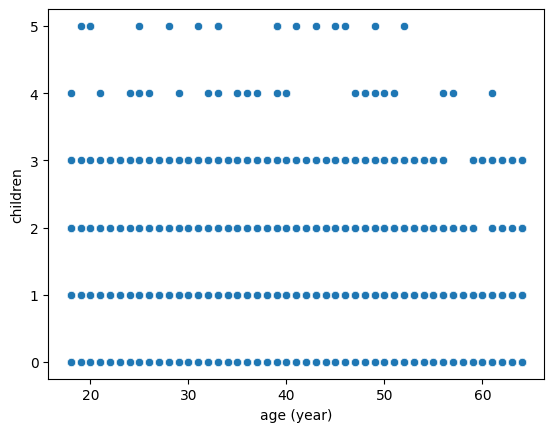

In [15]:
plt1 = sns.scatterplot(x = 'age', y = 'children', data = df)
plt1.set_xlabel('age (year)')
plt1.set_ylabel('children')
plt.show()

<ipython-input-16-72f493c01a9c>:2: FutureWarning: `sort_columns` is deprecated and will be removed in a future version.
  plt1 = df_comp_avg_price.plot(x = 'children', kind='bar',legend = True, sort_columns = True, figsize = (15,3))


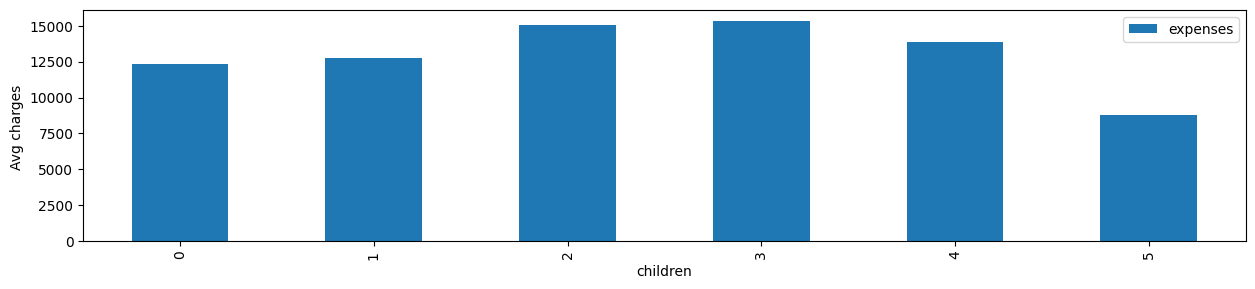

In [16]:
df_comp_avg_price = df[['children','expenses']].groupby("children", as_index = False).mean()
plt1 = df_comp_avg_price.plot(x = 'children', kind='bar',legend = True, sort_columns = True, figsize = (15,3))
plt1.set_xlabel("children")
plt1.set_ylabel("Avg charges ")
xticks(rotation = 90)
plt.show()

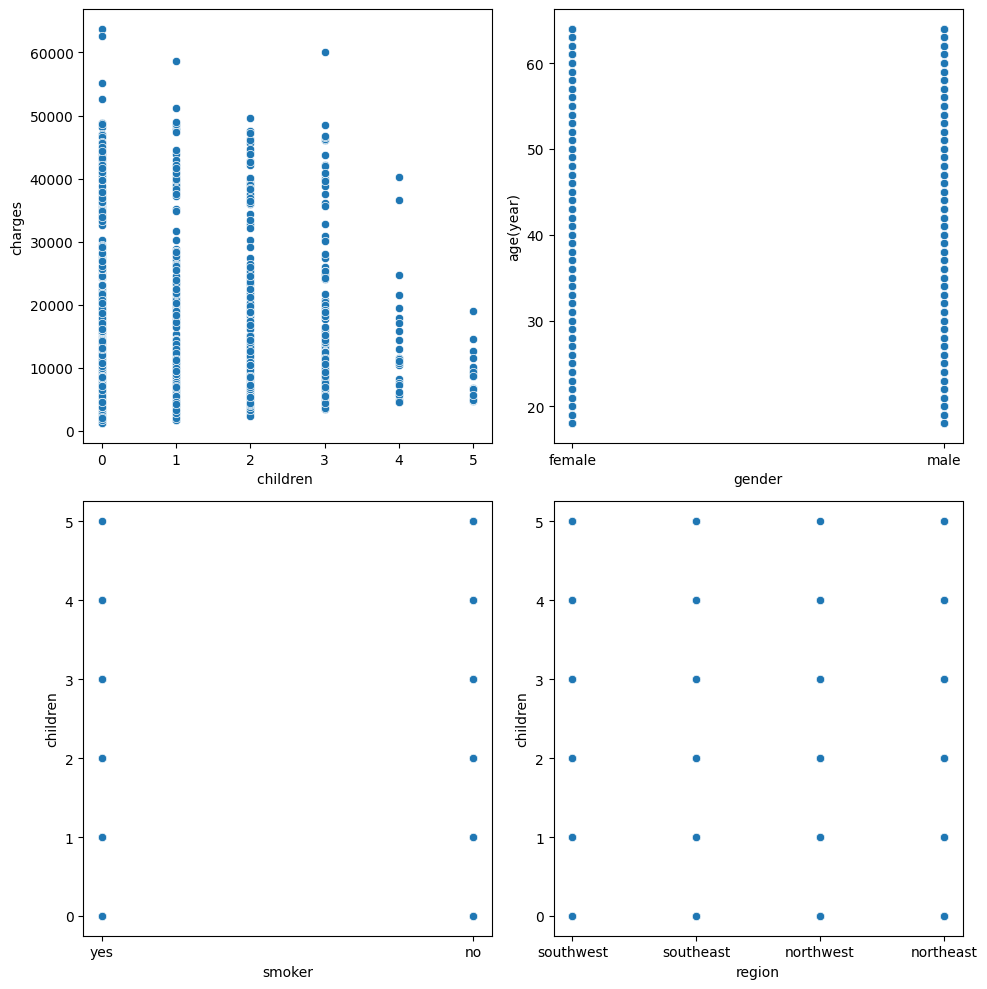

In [17]:
fig, axs = plt.subplots(2,2,figsize=(10,10))
plt1 = sns.scatterplot(x = 'children', y = 'expenses', data = df, ax = axs[0,0])
plt1.set_xlabel('children ')
plt1.set_ylabel('charges')
plt2 = sns.scatterplot(x = 'sex', y = 'age', data = df, ax = axs[0,1])
plt2.set_xlabel('gender')
plt2.set_ylabel('age(year)')
plt3 = sns.scatterplot(x = 'smoker', y = 'children', data = df, ax = axs[1,0])
plt3.set_xlabel('smoker')
plt3.set_ylabel('children')
plt3 = sns.scatterplot(x = 'region', y = 'children', data = df, ax = axs[1,1])
plt3.set_xlabel('region')
plt3.set_ylabel('children')
plt.tight_layout()

<ipython-input-18-d94a616b6916>:2: FutureWarning: `sort_columns` is deprecated and will be removed in a future version.
  plt1 = df_comp_avg_price.plot(x = 'smoker', kind='bar',legend = True, sort_columns = True, figsize = (5,5))


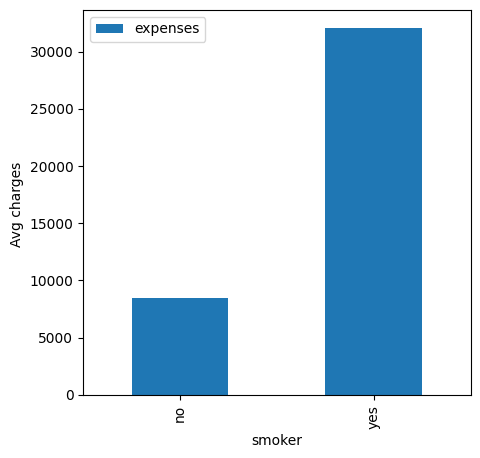

In [18]:
df_comp_avg_price = df[['smoker','expenses']].groupby("smoker", as_index = False).mean()
plt1 = df_comp_avg_price.plot(x = 'smoker', kind='bar',legend = True, sort_columns = True, figsize = (5,5))
plt1.set_xlabel("smoker")
plt1.set_ylabel("Avg charges ")
xticks(rotation = 90)
plt.show()

<ipython-input-19-c54f9246a0a7>:2: FutureWarning: `sort_columns` is deprecated and will be removed in a future version.
  plt1 = df_comp_avg_price.plot(x = 'smoker', kind='bar',legend = True, sort_columns = True, figsize = (5,5))


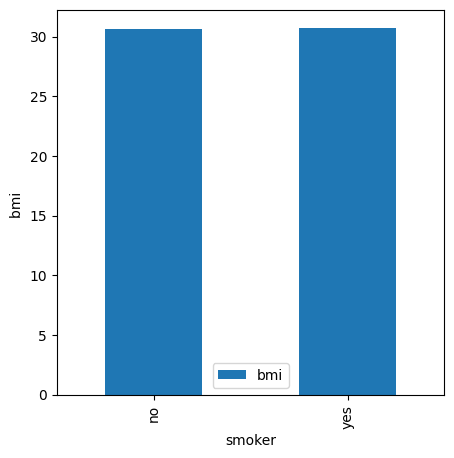

In [19]:
df_comp_avg_price = df[['smoker','bmi']].groupby("smoker", as_index = False).mean()
plt1 = df_comp_avg_price.plot(x = 'smoker', kind='bar',legend = True, sort_columns = True, figsize = (5,5))
plt1.set_xlabel("smoker")
plt1.set_ylabel("bmi ")
xticks(rotation = 90)
plt.show()

In [20]:
len(df[(df['sex']== 'male') & (df['smoker']=='yes')])



159

In [21]:
auto=df[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses']]

In [22]:
auto

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


<Figure size 1500x1500 with 0 Axes>

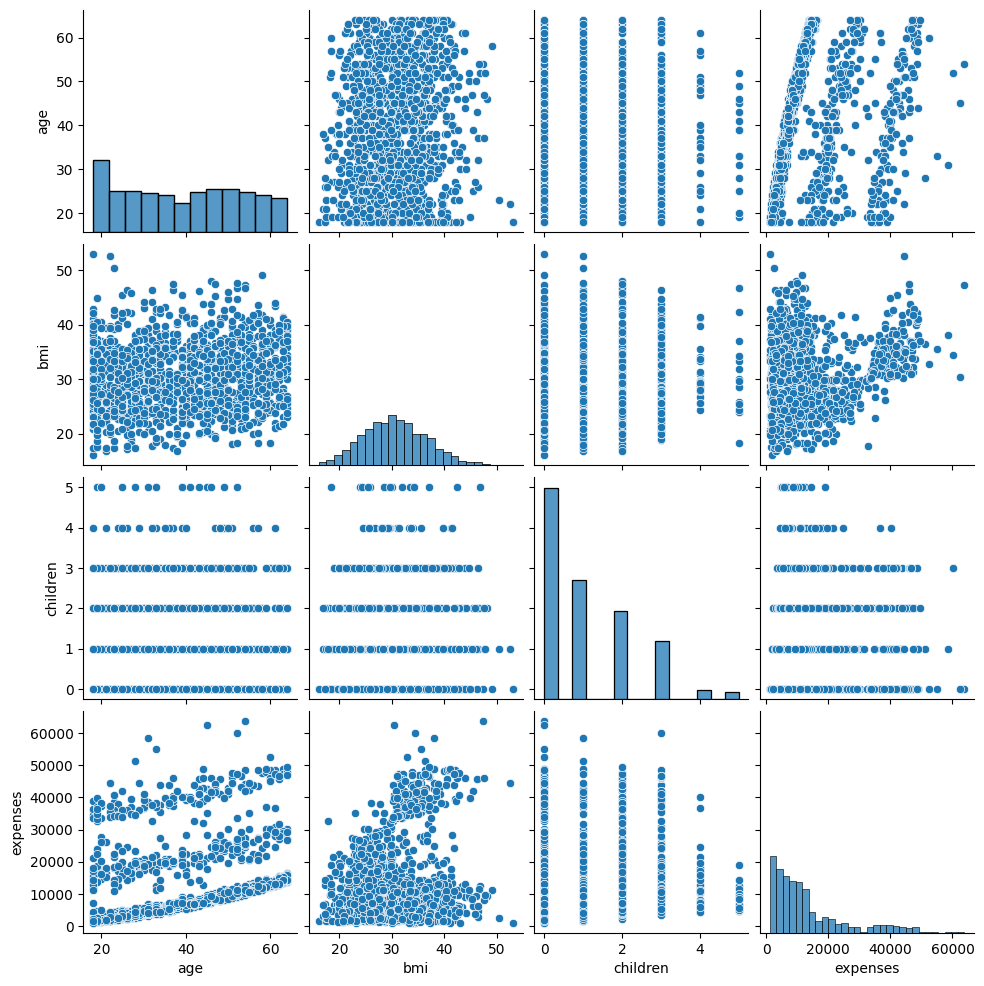

In [23]:
plt.figure(figsize=(15, 15))
sns.pairplot(auto)
plt.show()

<Axes: >

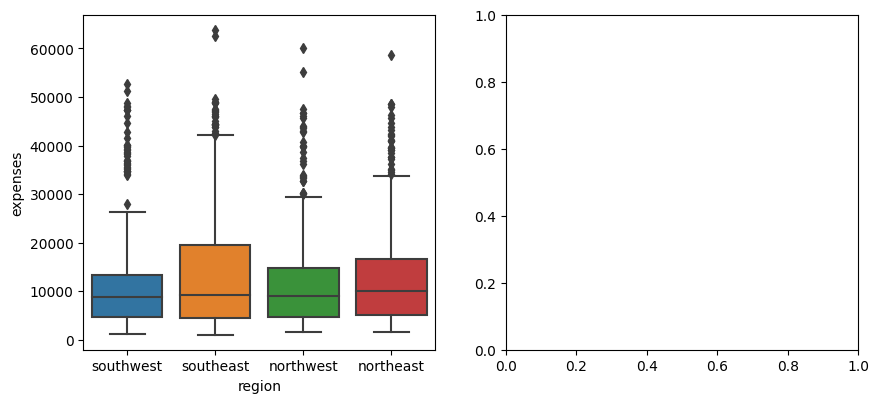

In [24]:
plt.figure(figsize=(10, 20))
plt.subplot(4,2,1)
sns.boxplot(x = 'region', y = 'expenses', data = auto)
plt.subplot(4,2,2)

In [25]:
gender = pd.get_dummies(auto['sex'], drop_first = True)

In [26]:
auto = pd.concat([auto, gender], axis = 1)

In [27]:
region_typ = pd.get_dummies(auto['region'], drop_first = True)

In [28]:
auto = pd.concat([auto, region_typ], axis = 1)

In [29]:
smoker = pd.get_dummies(auto['smoker'], drop_first = True)

In [30]:
auto = pd.concat([auto, smoker], axis = 1)

In [31]:
auto.drop(['sex','region','smoker'], axis = 1, inplace = True)

In [32]:
auto

,age,bmi,children,expenses,male,northwest,southeast,southwest,yes
0,19,27.9,0,16884.92,0,0,0,1,1
1,18,33.8,1,1725.55,1,0,1,0,0
2,28,33.0,3,4449.46,1,0,1,0,0
3,33,22.7,0,21984.47,1,1,0,0,0
4,32,28.9,0,3866.86,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,1,1,0,0,0
1334,18,31.9,0,2205.98,0,0,0,0,0
1335,18,36.9,0,1629.83,0,0,1,0,0
1336,21,25.8,0,2007.95,0,0,0,1,0


In [33]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(auto, train_size = 0.7, test_size = 0.3, random_state = 100)

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()

In [36]:
df_train.head()

,age,bmi,children,expenses,male,northwest,southeast,southwest,yes
966,51,24.8,2,23967.38,1,1,0,0,1
522,51,33.9,0,9866.30,0,0,0,0,0
155,44,39.5,0,6948.70,1,1,0,0,0
671,29,31.2,0,3943.60,0,0,0,0,0
1173,38,29.3,2,6457.84,1,1,0,0,0


In [37]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['age', 'bmi', 'children', 'expenses']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [38]:
df_train.head()

,age,bmi,children,expenses,male,northwest,southeast,southwest,yes
966,0.717391,0.237197,0.4,0.364661,1,1,0,0,1
522,0.717391,0.482480,0.0,0.139579,0,0,0,0,0
155,0.565217,0.633423,0.0,0.093008,1,1,0,0,0
671,0.239130,0.409704,0.0,0.045041,0,0,0,0,0
1173,0.434783,0.358491,0.4,0.085173,1,1,0,0,0


In [39]:
df_train.describe()

,age,bmi,children,expenses,male,northwest,southeast,southwest,yes
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,0.458171,0.398830,0.220513,0.192301,0.497863,0.244658,0.282051,0.242521,0.194444
std,0.306065,0.167424,0.241223,0.193690,0.500263,0.430114,0.450239,0.428837,0.395984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173913,0.276954,0.000000,0.055033,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.456522,0.390836,0.200000,0.129662,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.717391,0.512803,0.400000,0.245247,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


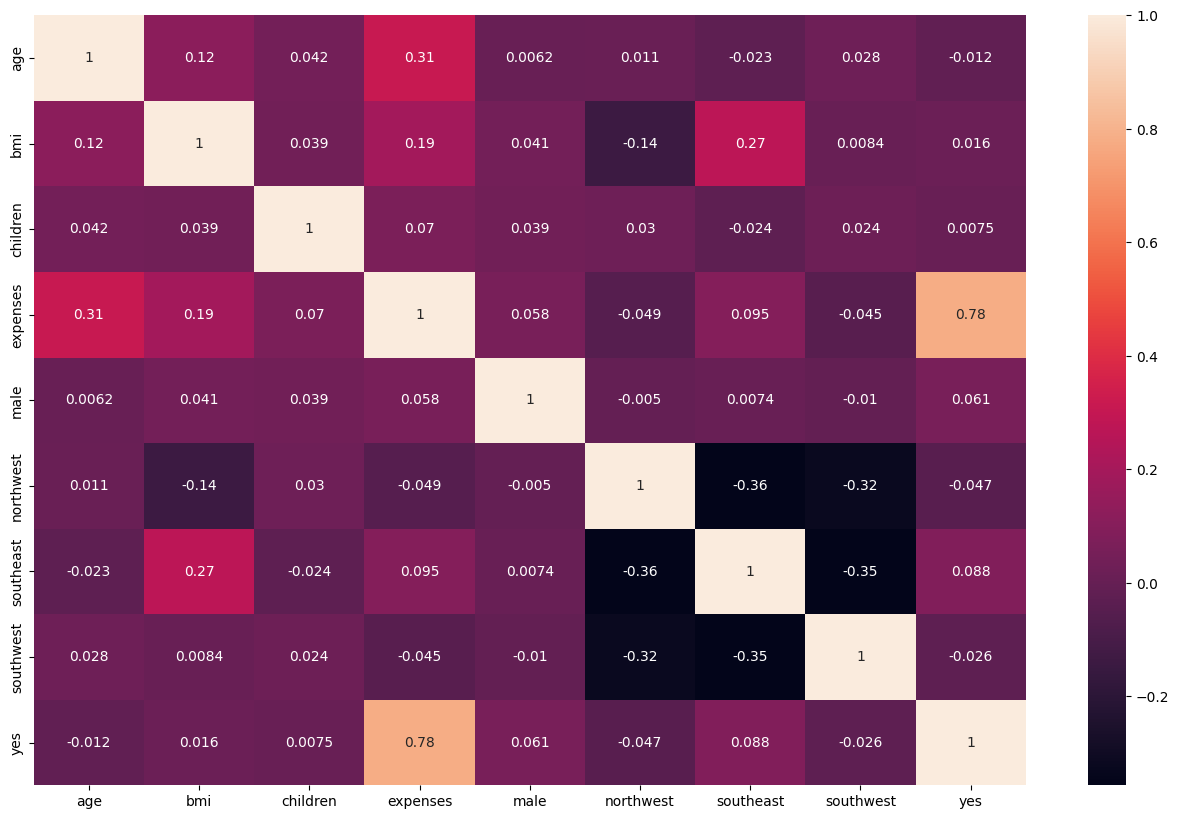

In [40]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True,)
plt.show()

In [41]:
y_train = df_train.pop('expenses')
X_train = df_train

In [42]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [43]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

#rfe = RFE(lm, 10)
rfe = RFE(lm, n_features_to_select=10)
#running RFE
rfe = rfe.fit(X_train, y_train)

In [44]:
X_train.columns

Index(['age', 'bmi', 'children', 'male', 'northwest', 'southeast', 'southwest',
       'yes'],
      dtype='object')

In [45]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('age', True, 1),
 ('bmi', True, 1),
 ('children', True, 1),
 ('male', True, 1),
 ('northwest', True, 1),
 ('southeast', True, 1),
 ('southwest', True, 1),
 ('yes', True, 1)]

In [46]:
col = X_train.columns[rfe.support_]
col

Index(['age', 'bmi', 'children', 'male', 'northwest', 'southeast', 'southwest',
       'yes'],
      dtype='object')

In [47]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [48]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [49]:
X_train_rfe

,const,age,bmi,children,male,northwest,southeast,southwest,yes
966,1.0,0.717391,0.237197,0.4,1,1,0,0,1
522,1.0,0.717391,0.482480,0.0,0,0,0,0,0
155,1.0,0.565217,0.633423,0.0,1,1,0,0,0
671,1.0,0.239130,0.409704,0.0,0,0,0,0,0
1173,1.0,0.434783,0.358491,0.4,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
802,1.0,0.065217,0.169811,0.2,1,0,0,1,0
53,1.0,0.391304,0.495957,0.0,1,0,1,0,1
350,1.0,0.847826,0.194070,0.0,0,1,0,0,0
79,1.0,0.500000,0.458221,0.0,0,1,0,0,0


Ordinary Least Squares regression (OLS) is a common technique for estimating coefficients of linear regression equations which describe the relationship between one or more independent quantitative variables and a dependent variable (simple or multiple linear regression).

In [50]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [51]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     326.2
Date:                Thu, 18 May 2023   Prob (F-statistic):          2.00e-263
Time:                        05:17:31   Log-Likelihood:                 835.45
No. Observations:                 936   AIC:                            -1653.
Df Residuals:                     927   BIC:                            -1609.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0330      0.011     -2.914      0.0

The Variance Inflation Factor (VIF) is a measure of colinearity among predictor variables within a multiple regression. It is calculated by taking the the ratio of the variance of all a given model's betas divide by the variane of a single beta if it were fit alone.

In [52]:
# Dropping male as p-value is high.
X_train_new1 = X_train_rfe.drop(["male"], axis = 1)

X_train_new1



,const,age,bmi,children,northwest,southeast,southwest,yes
966,1.0,0.717391,0.237197,0.4,1,0,0,1
522,1.0,0.717391,0.482480,0.0,0,0,0,0
155,1.0,0.565217,0.633423,0.0,1,0,0,0
671,1.0,0.239130,0.409704,0.0,0,0,0,0
1173,1.0,0.434783,0.358491,0.4,1,0,0,0
...,...,...,...,...,...,...,...,...
802,1.0,0.065217,0.169811,0.2,0,0,1,0
53,1.0,0.391304,0.495957,0.0,0,1,0,1
350,1.0,0.847826,0.194070,0.0,1,0,0,0
79,1.0,0.500000,0.458221,0.0,1,0,0,0


In [53]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new1)
X_train_lm


,const,age,bmi,children,northwest,southeast,southwest,yes
966,1.0,0.717391,0.237197,0.4,1,0,0,1
522,1.0,0.717391,0.482480,0.0,0,0,0,0
155,1.0,0.565217,0.633423,0.0,1,0,0,0
671,1.0,0.239130,0.409704,0.0,0,0,0,0
1173,1.0,0.434783,0.358491,0.4,1,0,0,0
...,...,...,...,...,...,...,...,...
802,1.0,0.065217,0.169811,0.2,0,0,1,0
53,1.0,0.391304,0.495957,0.0,0,1,0,1
350,1.0,0.847826,0.194070,0.0,1,0,0,0
79,1.0,0.500000,0.458221,0.0,1,0,0,0


In [54]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     373.2
Date:                Thu, 18 May 2023   Prob (F-statistic):          9.99e-265
Time:                        05:17:31   Log-Likelihood:                 835.45
No. Observations:                 936   AIC:                            -1655.
Df Residuals:                     928   BIC:                            -1616.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0330      0.011     -3.010      0.0

In [55]:
# Dropping northwest as p value is high.
X_train_new2 = X_train_new1.drop(["northwest"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new2)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     434.8
Date:                Thu, 18 May 2023   Prob (F-statistic):          1.04e-265
Time:                        05:17:31   Log-Likelihood:                 834.63
No. Observations:                 936   AIC:                            -1655.
Df Residuals:                     929   BIC:                            -1621.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0390      0.010     -3.924      0.0

In [56]:
# Dropping southwest as p-value is high.
X_train_new3 = X_train_new2.drop(["southeast"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new3)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     521.5
Date:                Thu, 18 May 2023   Prob (F-statistic):          7.77e-267
Time:                        05:17:31   Log-Likelihood:                 834.04
No. Observations:                 936   AIC:                            -1656.
Df Residuals:                     930   BIC:                            -1627.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0398      0.010     -4.024      0.0

In [57]:
# Dropping southeast as p value is high.
X_train_new4 = X_train_new3.drop(["southwest"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new4)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     648.3
Date:                Thu, 18 May 2023   Prob (F-statistic):          2.65e-267
Time:                        05:17:31   Log-Likelihood:                 831.80
No. Observations:                 936   AIC:                            -1654.
Df Residuals:                     931   BIC:                            -1629.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0433      0.010     -4.431      0.0

In [58]:
# Dropping children as p value is high.
X_train_new5 = X_train_new4.drop(["children"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new5)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     856.1
Date:                Thu, 18 May 2023   Prob (F-statistic):          3.30e-267
Time:                        05:17:31   Log-Likelihood:                 828.10
No. Observations:                 936   AIC:                            -1648.
Df Residuals:                     932   BIC:                            -1629.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0365      0.009     -3.848      0.0

In [59]:
y_train_price = lm.predict(X_train_lm)
y_train_price

966     0.523607
522     0.181488
155     0.177438
671     0.077630
1173    0.106630
          ...   
802     0.004318
53      0.504154
350     0.158474
79      0.135749
792     0.012528
Length: 936, dtype: float64

In [60]:
# # df_test
# lm.predict(df_test)

In [61]:
df_test

,age,bmi,children,expenses,male,northwest,southeast,southwest,yes
12,23,34.4,0,1826.84,1,0,0,1,0
306,28,27.5,2,20177.67,0,0,0,1,0
318,44,27.6,0,7421.19,0,1,0,0,0
815,20,31.5,0,1877.93,0,0,1,0,0
157,18,25.2,0,15518.18,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
710,18,35.2,1,1727.54,1,0,1,0,0
1005,29,31.7,2,4433.39,1,1,0,0,0
389,24,30.2,3,4618.08,0,1,0,0,0
923,34,35.8,0,4320.41,1,1,0,0,0


In [62]:
num_vars = ['age', 'bmi', 'children', 'expenses']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [63]:
df_test

,age,bmi,children,expenses,male,northwest,southeast,southwest,yes
12,0.108696,0.495957,0.0,0.011253,1,0,0,1,0
306,0.217391,0.309973,0.4,0.304170,0,0,0,1,0
318,0.565217,0.312668,0.0,0.100550,0,1,0,0,0
815,0.043478,0.417790,0.0,0.012068,0,0,1,0,0
157,0.000000,0.247978,0.0,0.229795,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
710,0.000000,0.517520,0.2,0.009668,1,0,1,0,0
1005,0.239130,0.423181,0.4,0.052859,1,1,0,0,0
389,0.130435,0.382749,0.6,0.055807,0,1,0,0,0
923,0.347826,0.533693,0.0,0.051055,1,1,0,0,0


In [64]:
y_test = df_test.pop('expenses')
X_test = df_test

In [65]:
y_test

12      0.011253
306     0.304170
318     0.100550
815     0.012068
157     0.229795
          ...   
710     0.009668
1005    0.052859
389     0.055807
923     0.051055
1164    0.096278
Name: expenses, Length: 402, dtype: float64

In [66]:
X_test

,age,bmi,children,male,northwest,southeast,southwest,yes
12,0.108696,0.495957,0.0,1,0,0,1,0
306,0.217391,0.309973,0.4,0,0,0,1,0
318,0.565217,0.312668,0.0,0,1,0,0,0
815,0.043478,0.417790,0.0,0,0,1,0,0
157,0.000000,0.247978,0.0,1,0,0,0,1
...,...,...,...,...,...,...,...,...
710,0.000000,0.517520,0.2,1,0,1,0,0
1005,0.239130,0.423181,0.4,1,1,0,0,0
389,0.130435,0.382749,0.6,0,1,0,0,0
923,0.347826,0.533693,0.0,1,1,0,0,0


In [67]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[['age','bmi','yes']]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [68]:
# Making predictions
y_pred = lm.predict(X_test_new)
y_pred

12      0.066976
306     0.056850
318     0.124018
815     0.041448
157     0.387796
          ...   
710     0.049718
1005    0.079875
389     0.052291
923     0.119130
1164    0.114650
Length: 402, dtype: float64

In [69]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.7777788976289104

Text(0, 0.5, 'y_pred')

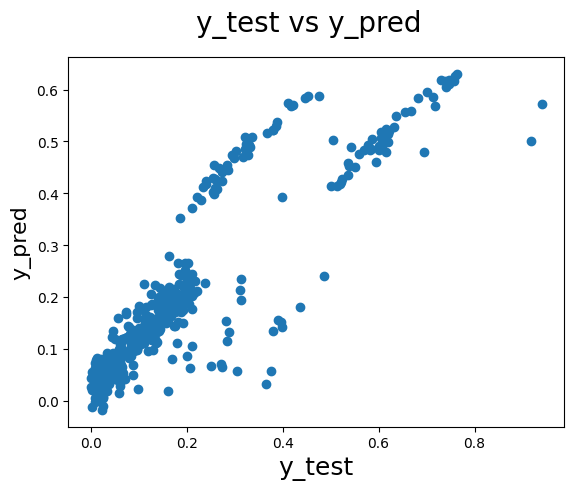

In [70]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [71]:
# charges = 0.1918age+0.1668 bmi+0.3830 yes-0.0366